In [53]:
import json
import spacy
import string
import numpy as np
from tqdm import tqdm_notebook as tqdm
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en')
nlp_light = spacy.load('en', disable=['parser', 'tagger', 'ner'])
stop_words = spacy.lang.en.stop_words.STOP_WORDS
alphabet = string.ascii_lowercase

In [187]:
with open('../data/review_decisions.json') as f:
    data = json.load(f)

## Defining Helper Functions

In [177]:
def get_review_rating_pairs(data):

    review_rating_pairs = dict()
    for doc_id in data:
        if('revisions' in data[doc_id]):
            for revision in data[doc_id]['revisions']:
                if('reviews' in data[doc_id]['revisions'][revision]):
                    for review in data[doc_id]['revisions'][revision]['reviews']:
                        review_obj = data[doc_id]['revisions'][revision]['reviews'][review]
                        if('text' in review_obj and 'decision' in review_obj):
                            if(len(review_obj['text']) > 0 and len(review_obj['decision']) > 0):
                                decision = review_obj['decision']
                                text = review_obj['text']
                                if(decision not in review_rating_pairs):
                                    review_rating_pairs[decision] = list()
                                review_rating_pairs[decision].append(text)
    
    return review_rating_pairs

In [84]:
def forbidden(word):

    if(word.lower() in stop_words):
        return True
    else:
        for character in word.lower():
            if(character in alphabet):
                return False
        return True

    return False

In [80]:
def get_classwise_word_counts(data):
    word_counts = dict()
    for decision in data:
        word_counts[decision] = Counter()
        for text in data[decision]:
            for token in nlp_light(text):
                if(not forbidden(token.text)):
                    word_counts[decision][token.text] += 1

    return word_counts

In [81]:
def get_classwise_lengths(data):

    lengths = dict()
    for decision in data:
        lengths[decision] = list()
        for text in data[decision]:
            lengths[decision].append(len(nlp_light(text)))

    return lengths

In [159]:
review_rating_pairs = get_review_rating_pairs(data)

## General Statistics

In [173]:
review_rating_pairs['[Terminated by Academic Editor]']

['The authors answered all items requested. Then, the manuscript is now acceptable for publication',
 "Review, Barbosa et al. This paper presents an interesting study examining the effect of temporary lesions of hippocampal structures on behaviour in a long-term object recognition memory task. Their main findings I found to be quite interesting. Rats will preferentially investgate objects that were experienced in an arena 24-hours before test compared to objects experienced in the same arena 23-hours before test. Moreover, the rats will also prefer to investigate objects that had shifted their spatial location within the arena at test compared to those that were in the same location. Moreover, the authors demonstrate that: 1. temporarily inhibiting activity in CA1 with muscimol during the sample trial reduced the preference for the older object, whereas inhibition of CA3/DG did not affect this 2. temporarily inhibiting CA1 or CA3/DG with muscimol during the sample trial affected prefer

In [118]:
len(review_rating_pairs['Reject'])

3834

In [119]:
len(review_rating_pairs['Minor Revision'])

6644

In [120]:
len(review_rating_pairs['Major Revision'])

7103

In [180]:
total_reviews = 0
r_d = 0
r_no_d = 0
no_r_no_d = 0
no_r_d = 0
for doc_id in data:
    for revision in data[doc_id]['revisions']:
        if('reviews' in data[doc_id]['revisions'][revision]):
            for review in data[doc_id]['revisions'][revision]['reviews']:
                total_reviews += 1
                review_obj = data[doc_id]['revisions'][revision]['reviews'][review]
                if('text' in review_obj and 'decision' not in review_obj):
                    review = review_obj['text']
                    if(len(review) > 0):
                        r_no_d += 1
                    else:
                        no_r_no_d += 1

                elif('text' not in review_obj and 'decision' in review_obj):
                    decision = review_obj['decision']
                    if(len(decision) > 0):
                        no_r_d += 1
                    else:
                        no_r_no_d += 1
                elif('text' in review_obj and 'decision' in review_obj):
                    review = review_obj['text']
                    decision = review_obj['decision']
                    empty_reviews_without_ids += 1
                    if(len(review) > 0 and len(decision) > 0):
                        r_d += 1
                    elif(len(review) > 0 and len(decision) == 0):
                        r_no_d += 1
                    else:
                        no_r_d += 1

In [185]:
no_r_d

19435

## Lexical Analysis

In [23]:
word_counts = get_classwise_word_counts(review_rating_pairs)

In [24]:
word_counts['Accept'].most_common(20)

[('authors', 4576),
 ('manuscript', 2800),
 ('paper', 1773),
 ('addressed', 1517),
 ('comments', 1504),
 ('data', 1276),
 ('study', 1264),
 ('concerns', 1230),
 ('publication', 1107),
 ('results', 1101),
 ('revised', 817),
 ('line', 736),
 ('previous', 660),
 ('improved', 642),
 ('et', 614),
 ('al', 609),
 ('interesting', 601),
 ('cells', 583),
 ('work', 580),
 ('think', 552)]

In [25]:
word_counts['Reject'].most_common(20)

[('authors', 15304),
 ('data', 7479),
 ('study', 6772),
 ('results', 5802),
 ('manuscript', 4617),
 ('cells', 4266),
 ('paper', 4195),
 ('different', 3795),
 ('analysis', 3505),
 ('et', 3417),
 ('al', 3390),
 ('effect', 3127),
 ('effects', 2868),
 ('line', 2855),
 ('Figure', 2626),
 ('expression', 2623),
 ('time', 2591),
 ('cell', 2514),
 ('brain', 2509),
 ('use', 2436)]

In [27]:
word_counts['Minor Revision'].most_common(20)

[('authors', 19671),
 ('data', 8106),
 ('study', 7597),
 ('line', 7481),
 ('results', 7305),
 ('manuscript', 6646),
 ('paper', 6273),
 ('cells', 4733),
 ('Figure', 4387),
 ('different', 4377),
 ('Page', 4173),
 ('et', 4043),
 ('al', 4022),
 ('effect', 3586),
 ('discussion', 3526),
 ('analysis', 3412),
 ('page', 3315),
 ('use', 3276),
 ('expression', 3201),
 ('effects', 3199)]

In [28]:
word_counts['Major Revision'].most_common(20)

[('authors', 33368),
 ('data', 15374),
 ('results', 13360),
 ('study', 12939),
 ('manuscript', 9468),
 ('line', 8614),
 ('cells', 8023),
 ('paper', 7837),
 ('different', 7802),
 ('analysis', 7650),
 ('et', 7341),
 ('al', 7322),
 ('Figure', 6968),
 ('effect', 6434),
 ('effects', 6055),
 ('time', 5645),
 ('Page', 5489),
 ('expression', 5423),
 ('use', 5349),
 ('brain', 5280)]

In [174]:
word_counts['[Terminated by Academic Editor]']

Counter({'authors': 6,
         'answered': 1,
         'items': 1,
         'requested': 1,
         'manuscript': 2,
         'acceptable': 1,
         'publication': 2,
         'Review': 1,
         'Barbosa': 1,
         'et': 3,
         'al': 3,
         'paper': 4,
         'presents': 3,
         'interesting': 4,
         'study': 3,
         'examining': 1,
         'effect': 3,
         'temporary': 1,
         'lesions': 1,
         'hippocampal': 1,
         'structures': 1,
         'behaviour': 4,
         'long': 4,
         'term': 2,
         'object': 4,
         'recognition': 1,
         'memory': 9,
         'task': 1,
         'main': 1,
         'findings': 1,
         'found': 2,
         'Rats': 1,
         'preferentially': 2,
         'investgate': 1,
         'objects': 6,
         'experienced': 3,
         'arena': 3,
         '24-hours': 1,
         'test': 4,
         'compared': 2,
         '23-hours': 1,
         'rats': 2,
         'prefer': 1,
    

## Length

In [29]:
lengths = get_classwise_lengths(review_rating_pairs)

In [31]:
np.mean(lengths['Reject'])

605.5576421491915

In [32]:
np.mean(lengths['Accept'])

98.48509828788839

In [33]:
np.mean(lengths['Major Revision'])

728.464451640152

In [34]:
np.mean(lengths['Minor Revision'])

470.5680313064419

In [175]:
np.mean(lengths['[Terminated by Academic Editor]'])

171.16666666666666

In [49]:
np.std(lengths['Accept'])

152.27603573396604

In [50]:
np.std(lengths['Reject'])

473.5232359913895

In [51]:
np.std(lengths['Major Revision'])

513.4513671794081

In [52]:
np.std(lengths['Minor Revision'])

365.4278648659776

In [176]:
np.std(lengths['[Terminated by Academic Editor]'])

188.31659217628405

Text(0.5,1,'Accept')

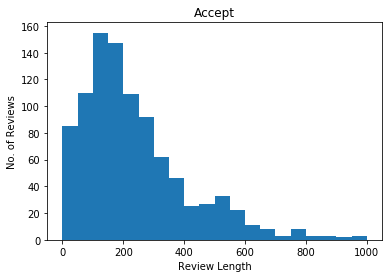

In [270]:
plt.hist(lengths['Accept'], bins=20, range=(0,1000))
plt.xlabel('Review Length')
plt.ylabel('No. of Reviews')
plt.title('Accept')

Text(0.5,1,'Reject')

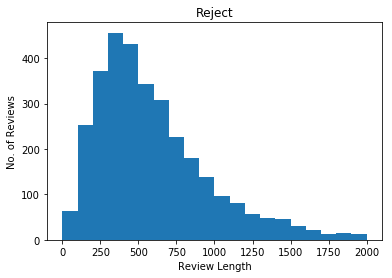

In [271]:
plt.hist(lengths['Reject'], bins=20, range=(0,2000))
plt.xlabel('Review Length')
plt.ylabel('No. of Reviews')
plt.title('Reject')

Text(0.5,1,'Major Revision')

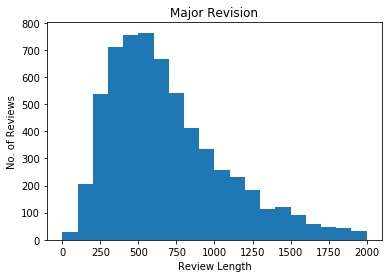

In [272]:
plt.hist(lengths['Major Revision'], bins=20, range=(0,2000))
plt.xlabel('Review Length')
plt.ylabel('No. of Reviews')
plt.title('Major Revision')

Text(0.5,1,'Minor Revision')

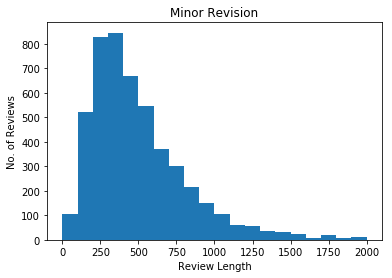

In [273]:
plt.hist(lengths['Minor Revision'], bins=20, range=(0,2000))
plt.xlabel('Review Length')
plt.ylabel('No. of Reviews')
plt.title('Minor Revision')

## Group by Revision

In [188]:
data

{'11315': {'revisions': {'0': {'reviews': {'54221': {'text': "Major concerns: 1. The result that in vivo MRI can be used as a diagnostic tool to determine the time of onset of chronic inflammation is not novel 2. All images provide in the paper are poor and difficult to idendify details, especially in the histological sections. 3. There is no evidence for the inflammation in the injured spinal cord. Some immunohistochimical studies will be helpful. 4. The author mentioned that 'quantitative data of inflammation' several time in the manuscript, but inflammation in the spinal cord is not clearly shown. 5. The experimental design is not clear. The postinjury examination for MRI and histology are all in different time points. ",
      'decision': 'Reject'},
     '53383': {'text': "This paper 'In Vivo MRI View of Chronic Inflammation in Injured Rat Spinal Cord: Onset, Progression and Effective Intervention' provided the T2-weighted sagittal images of either untreated or irradiated severed r

In [200]:
data_by_revision = dict()
for doc_id in data:
    if('revisions') in data[doc_id]:
        for revision in data[doc_id]['revisions']:
            if(revision not in data_by_revision):
                data_by_revision[revision] = dict()
            if('reviews' in data[doc_id]['revisions'][revision]):
                for review in data[doc_id]['revisions'][revision]['reviews']:
                    review_obj = data[doc_id]['revisions'][revision]['reviews'][review]
                    if('text' in review_obj and 'decision' in review_obj):
                        if(len(review_obj['text']) > 0 and len(review_obj['decision']) > 0):
                            if(review_obj['decision'] not in data_by_revision[revision]):
                                data_by_revision[revision][review_obj['decision']] = list()
                            data_by_revision[revision][review_obj['decision']].append(review_obj['text'])

In [229]:
lengths = dict()
for decision in data_by_revision['0']:
    lengths[decision] = list()
    for review in data_by_revision['0'][decision]:
        lengths[decision].append(len(nlp_light(review)))

246.527518172378 206.25855599678263


Text(0.5,1,'Accept')

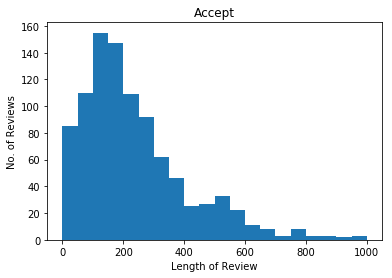

In [265]:
print(np.mean(lengths['Accept']), np.std(lengths['Accept']))
plt.hist(lengths['Accept'], bins=20, range=(0,1000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Accept')

623.6911220715167 460.8943045408283


Text(0.5,1,'Reject')

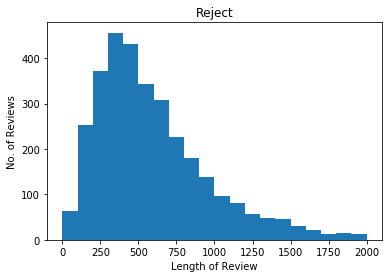

In [261]:
print(np.mean(lengths['Reject']), np.std(lengths['Reject']))
plt.hist(lengths['Reject'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Reject')

512.0604284559417 359.6826733267671


Text(0.5,1,'Minor Revision')

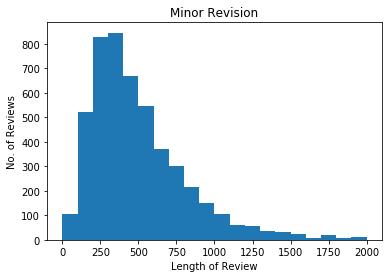

In [262]:
print(np.mean(lengths['Minor Revision']), np.std(lengths['Minor Revision']))
plt.hist(lengths['Minor Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Minor Revision')

738.5674255691769 502.02556270554464


Text(0.5,1,'Major Revision')

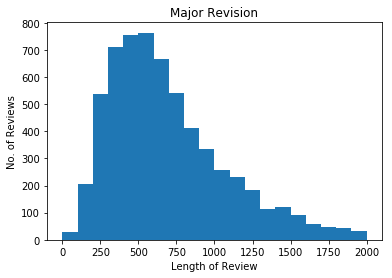

In [252]:
print(np.mean(lengths['Major Revision']), np.std(lengths['Major Revision']))
plt.hist(lengths['Major Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Major Revision')

60.370657568238215 105.27813814972376
517.5916334661355 543.1493365205101
344.8513786146604 347.88765603332206
662.4395604395604 602.2088865587723


Text(0.5,1,'Major Revision')

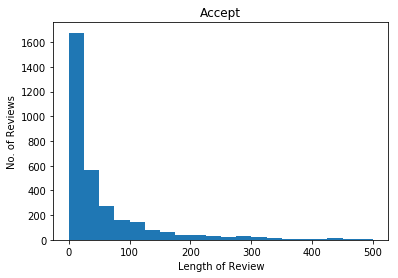

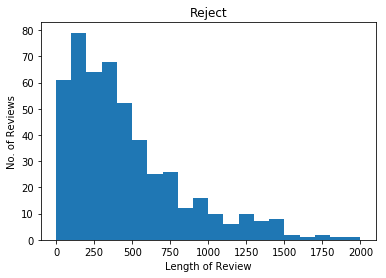

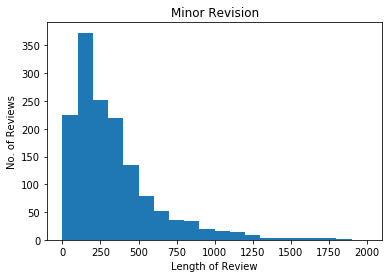

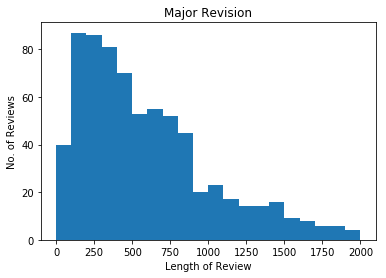

In [283]:
lengths = dict()
for decision in data_by_revision['1']:
    lengths[decision] = list()
    for review in data_by_revision['1'][decision]:
        lengths[decision].append(len(nlp_light(review)))

plt.figure(0)
print(np.mean(lengths['Accept']), np.std(lengths['Accept']))
plt.hist(lengths['Accept'], bins=20, range=(0,500))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Accept')

plt.figure(1)
print(np.mean(lengths['Reject']), np.std(lengths['Reject']))
plt.hist(lengths['Reject'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Reject')

plt.figure(2)
print(np.mean(lengths['Minor Revision']), np.std(lengths['Minor Revision']))
plt.hist(lengths['Minor Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Minor Revision')

plt.figure(3)
print(np.mean(lengths['Major Revision']), np.std(lengths['Major Revision']))
plt.hist(lengths['Major Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Major Revision')



59.89339019189765 100.31613854977964
429.7733333333333 393.9791389852457
371.0693641618497 415.324646105431
558.8765432098766 436.77195176068795


Text(0.5,1,'Major Revision')

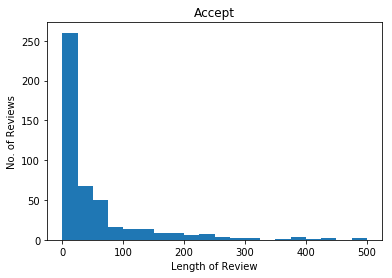

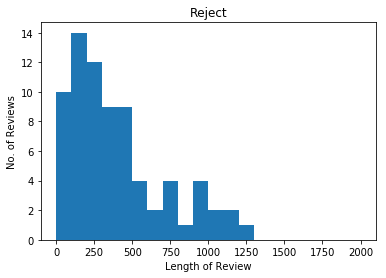

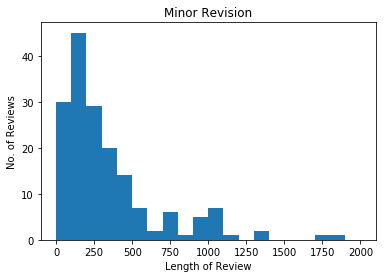

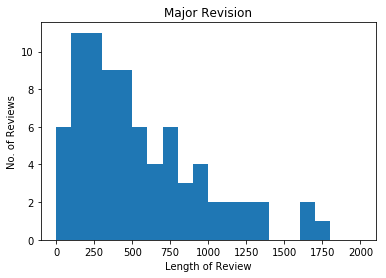

In [284]:
lengths = dict()
for decision in data_by_revision['2']:
    lengths[decision] = list()
    for review in data_by_revision['2'][decision]:
        lengths[decision].append(len(nlp_light(review)))

plt.figure(0)
print(np.mean(lengths['Accept']), np.std(lengths['Accept']))
plt.hist(lengths['Accept'], bins=20, range=(0,500))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Accept')

plt.figure(1)
print(np.mean(lengths['Reject']), np.std(lengths['Reject']))
plt.hist(lengths['Reject'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Reject')

plt.figure(2)
print(np.mean(lengths['Minor Revision']), np.std(lengths['Minor Revision']))
plt.hist(lengths['Minor Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Minor Revision')

plt.figure(3)
print(np.mean(lengths['Major Revision']), np.std(lengths['Major Revision']))
plt.hist(lengths['Major Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Major Revision')



82.72881355932203 168.5162397755299
630.1111111111111 553.687124736313
455.22222222222223 335.20423109383614
576.5833333333334 552.7893598730794


Text(0.5,1,'Major Revision')

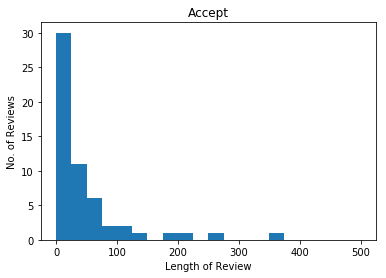

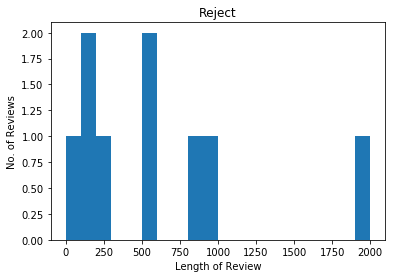

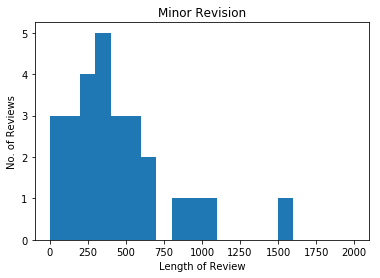

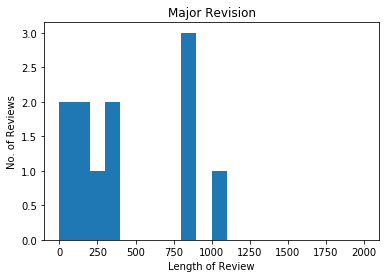

In [286]:
lengths = dict()
for decision in data_by_revision['3']:
    lengths[decision] = list()
    for review in data_by_revision['3'][decision]:
        lengths[decision].append(len(nlp_light(review)))

plt.figure(0)
print(np.mean(lengths['Accept']), np.std(lengths['Accept']))
plt.hist(lengths['Accept'], bins=20, range=(0,500))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Accept')

plt.figure(1)
print(np.mean(lengths['Reject']), np.std(lengths['Reject']))
plt.hist(lengths['Reject'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Reject')

plt.figure(2)
print(np.mean(lengths['Minor Revision']), np.std(lengths['Minor Revision']))
plt.hist(lengths['Minor Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Minor Revision')

plt.figure(3)
print(np.mean(lengths['Major Revision']), np.std(lengths['Major Revision']))
plt.hist(lengths['Major Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Major Revision')

32.285714285714285 19.969364291436058
231.66666666666666 123.60510597148576
422.5 222.0756252571032
897.0 0.0


Text(0.5,1,'Major Revision')

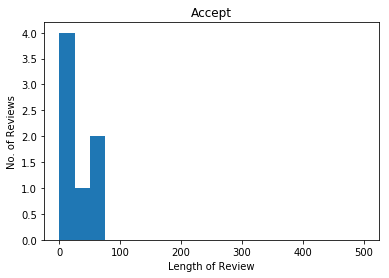

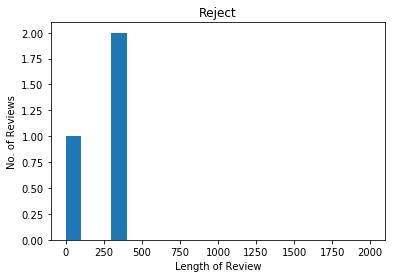

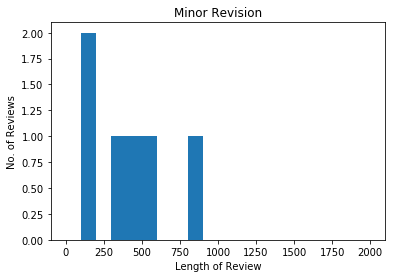

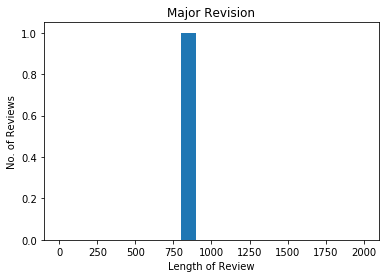

In [288]:
lengths = dict()
for decision in data_by_revision['4']:
    lengths[decision] = list()
    for review in data_by_revision['4'][decision]:
        lengths[decision].append(len(nlp_light(review)))

plt.figure(0)
print(np.mean(lengths['Accept']), np.std(lengths['Accept']))
plt.hist(lengths['Accept'], bins=20, range=(0,500))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Accept')

plt.figure(1)
print(np.mean(lengths['Reject']), np.std(lengths['Reject']))
plt.hist(lengths['Reject'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Reject')

plt.figure(2)
print(np.mean(lengths['Minor Revision']), np.std(lengths['Minor Revision']))
plt.hist(lengths['Minor Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Minor Revision')

plt.figure(3)
print(np.mean(lengths['Major Revision']), np.std(lengths['Major Revision']))
plt.hist(lengths['Major Revision'], bins=20, range=(0,2000))
plt.xlabel('Length of Review')
plt.ylabel('No. of Reviews')
plt.title('Major Revision')